In [291]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats

In [292]:
df = pd.read_excel("Real_Estate_Price.xlsx")

In [293]:
df.head()

,Id,LotArea,SalePrice
0,0,8450,208500.0
1,1,9600,181500.0
2,2,11250,223500.0
3,3,9550,140000.0
4,4,14260,250000.0


In [294]:
df.dropna(inplace=True)

z_scores = stats.zscore(df)

threshold = 3
outlier_mask = (z_scores < -threshold) | (z_scores > threshold)

# Removing rows with outliers
df_no_outliers = df[~outlier_mask.any(axis=1)]

x = df_no_outliers['LotArea']
y = df_no_outliers['SalePrice']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [295]:
means_x = x_train.mean(axis=0)
stds_x = x_train.std(axis=0)

means_y = y_train.mean(axis=0)
stds_y = y_train.std(axis=0)

# Normalization
x_train_normalized = (x_train - means_x) / stds_x
y_train_normalized = (y_train - means_y) / stds_y

In [296]:
def predict(X, beta):
    
    X_with_intercept = np.column_stack([np.ones(X.shape[0]), X])
    
    #ensuring proper dimensionality for dot product
    beta = beta.reshape(-1, 1)
    
    y_pred = np.dot(X_with_intercept, beta).flatten()
    return y_pred


In [331]:
def risk(y_true, y_pred):
    
    n = len(y_true)
    
    squared_errors = (y_true - y_pred) ** 2

    risk = (1 / 2*n) * np.sum(squared_errors)
    
    return risk

In [298]:
def gradient_descent(X, y, beta, alpha, iterations):
    n = len(y)  # Number of data points
    
    for _ in range(iterations):
        # Calculate predicted target variable
        y_pred = predict(X, beta)
        
        # Update all elements
        beta -= alpha * (1/n) * np.dot((y_pred - y), X)
    
    return beta


In [300]:
x_train_normalized_df = x_train_normalized.to_frame()
x_train_normalized_df['Intercept'] = 1

# Initialize beta 
beta_initial = np.zeros((1, x_train_normalized_df.shape[1]))
print("Shape of beta_initial:", beta_initial.shape)

#learning rate and number of iterations for gradient descent
alpha = 0.01
iterations = 100


Shape of beta_initial: (1, 2)


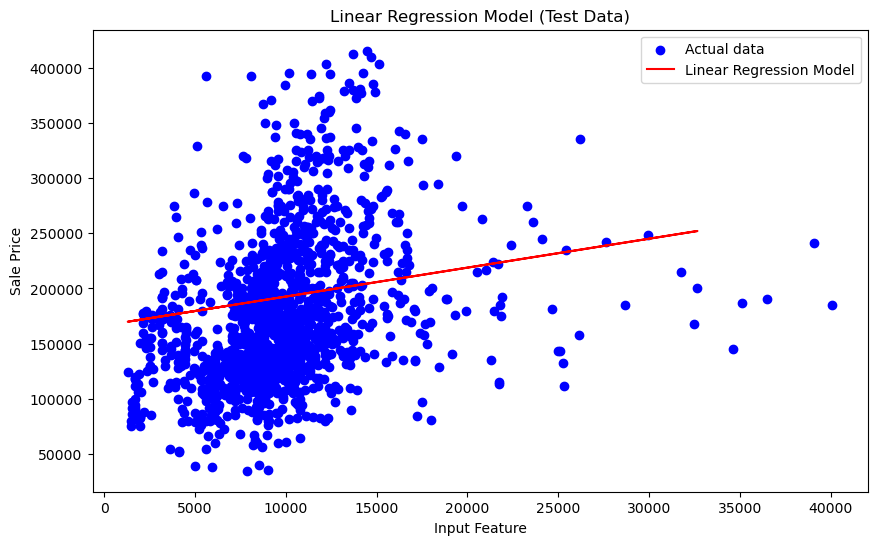

Risk (Mean Squared Error) on Test Data: 227773564307713.06


In [334]:
beta_optimized = gradient_descent(x_train_normalized.values, y_train_normalized.values, beta_initial, alpha, iterations)

x_test_normalized = (x_test - means) / stds
y_pred_test = predict(x_test_normalized.values, beta_optimized)

y_pred_test_denormalized = y_pred_test * y_test.std() + y_test.mean()

# Calculate risk 
riskk = risk(y_test.values, y_pred_test_denormalized)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Actual data')
plt.plot(x_test, y_pred_test_denormalized, color='red', label='Linear Regression Model')
plt.title('Linear Regression Model (Test Data)')
plt.xlabel('Input Feature')  
plt.ylabel('Sale Price')
plt.legend()
plt.show()

print(f"Risk (Mean Squared Error) on Test Data: {riskk}")


In [340]:
print(f"Coefficients: {beta_optimized}")

Coefficients: [[0.32138901 0.32138901]]
